In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [5]:
#pip install seaborn
#pip install sklearn

In [6]:
df=pd.read_csv("Diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
# Diccionario con las traducciones
traducciones = {
    'Pregnancies': 'Embarazos',
    'Glucose': 'Glucosa',
    'BloodPressure': 'PresionSanguinea',
    'SkinThickness': 'GrosorPiel',
    'Insulin': 'Insulina',
    'BMI': 'IMC',
    'DiabetesPedigreeFunction': 'FuncionPedegreeDiabetes',
    'Age': 'Edad',
    'Outcome': 'Resultado'
}

# Renombrar las columnas
df.rename(columns=traducciones, inplace=True)

In [8]:
#verifica los valores nulos en el dataframe
df.isnull().sum()

Embarazos                  0
Glucosa                    0
PresionSanguinea           0
GrosorPiel                 0
Insulina                   0
IMC                        0
FuncionPedegreeDiabetes    0
Edad                       0
Resultado                  0
dtype: int64

In [9]:
#Muestra nulos y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Embarazos                768 non-null    int64  
 1   Glucosa                  768 non-null    int64  
 2   PresionSanguinea         768 non-null    int64  
 3   GrosorPiel               768 non-null    int64  
 4   Insulina                 768 non-null    int64  
 5   IMC                      768 non-null    float64
 6   FuncionPedegreeDiabetes  768 non-null    float64
 7   Edad                     768 non-null    int64  
 8   Resultado                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#Muestra las columnas del df
df.columns

Index(['Embarazos', 'Glucosa', 'PresionSanguinea', 'GrosorPiel', 'Insulina',
       'IMC', 'FuncionPedegreeDiabetes', 'Edad', 'Resultado'],
      dtype='object')

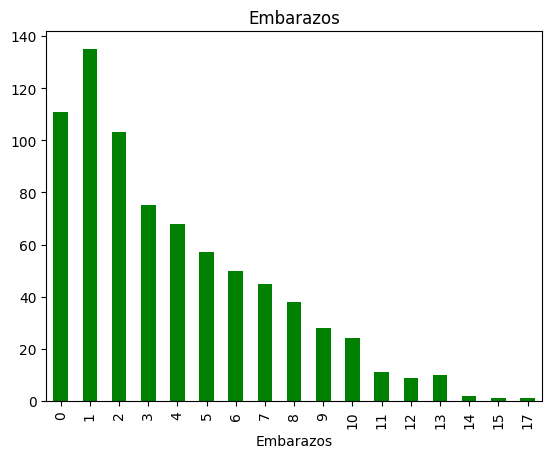

In [11]:
df['Embarazos'].value_counts().sort_index().plot(kind="bar", color="Green")
plt.title("Embarazos")
plt.show()

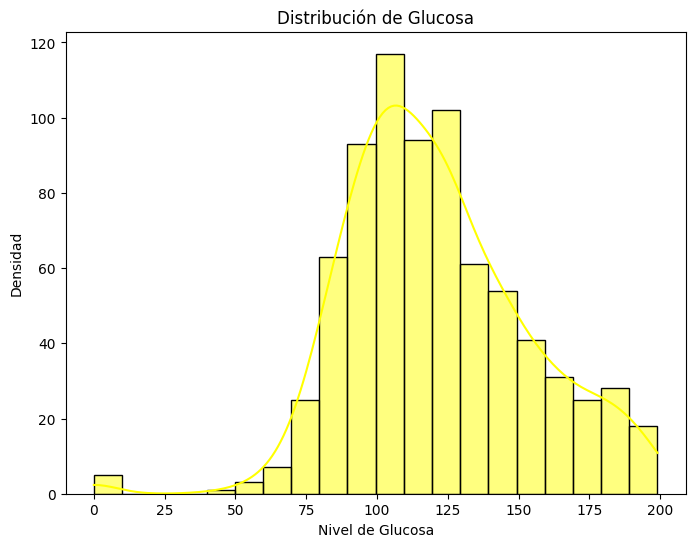

In [12]:
#Gráfica de la glucosa
plt.figure(figsize=(8, 6))
sns.histplot(df['Glucosa'], bins=20, kde=True, color='yellow')
plt.title('Distribución de Glucosa')
plt.xlabel('Nivel de Glucosa')
plt.ylabel('Densidad')
plt.show()

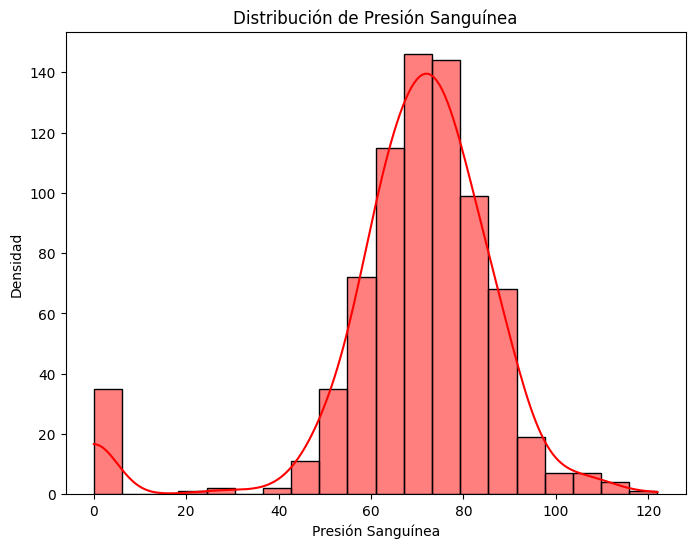

In [13]:
# Presión sanguínea
plt.figure(figsize=(8, 6))
sns.histplot(df['PresionSanguinea'], bins=20, kde=True, color='red')
plt.title('Distribución de Presión Sanguínea')
plt.xlabel('Presión Sanguínea')
plt.ylabel('Densidad')
plt.show()

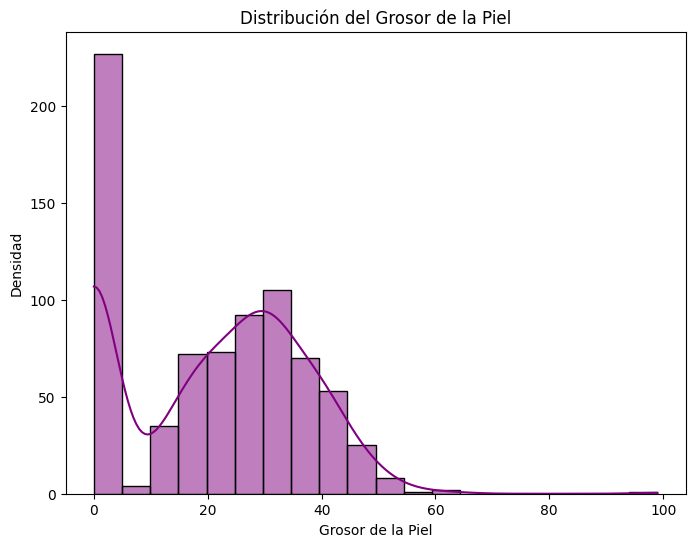

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['GrosorPiel'], bins=20, kde=True, color='purple')
plt.title('Distribución del Grosor de la Piel')
plt.xlabel('Grosor de la Piel')
plt.ylabel('Densidad')
plt.show()

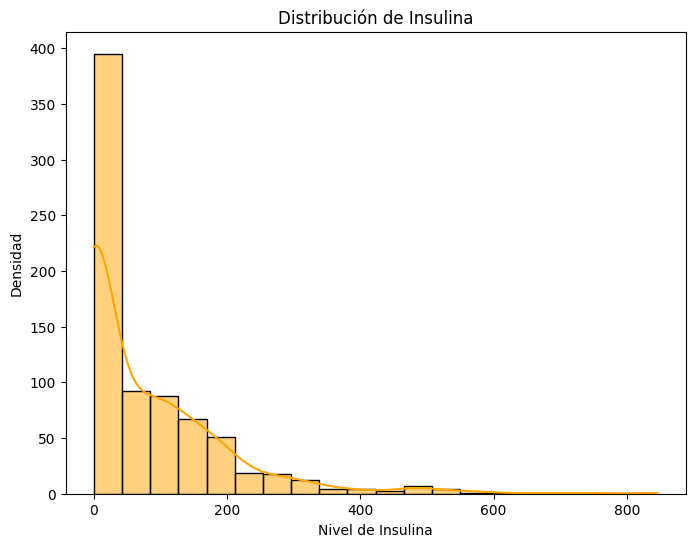

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Insulina'], bins=20, kde=True, color='orange')
plt.title('Distribución de Insulina')
plt.xlabel('Nivel de Insulina')
plt.ylabel('Densidad')
plt.show()

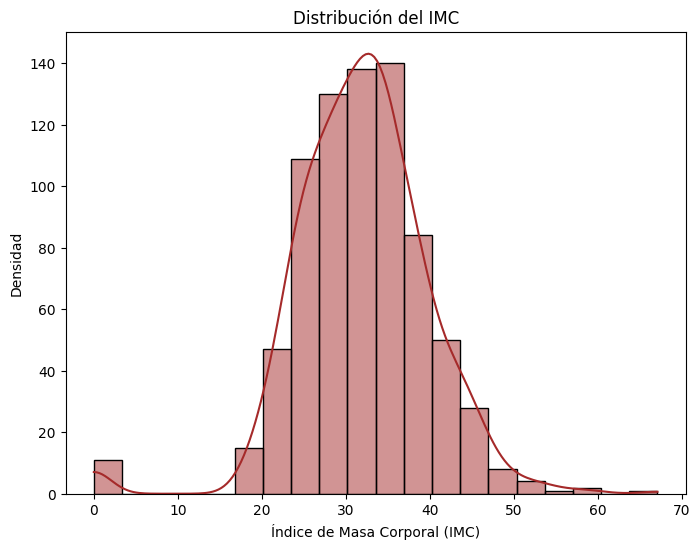

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['IMC'], bins=20, kde=True, color='brown')
plt.title('Distribución del IMC')
plt.xlabel('Índice de Masa Corporal (IMC)')
plt.ylabel('Densidad')
plt.show()

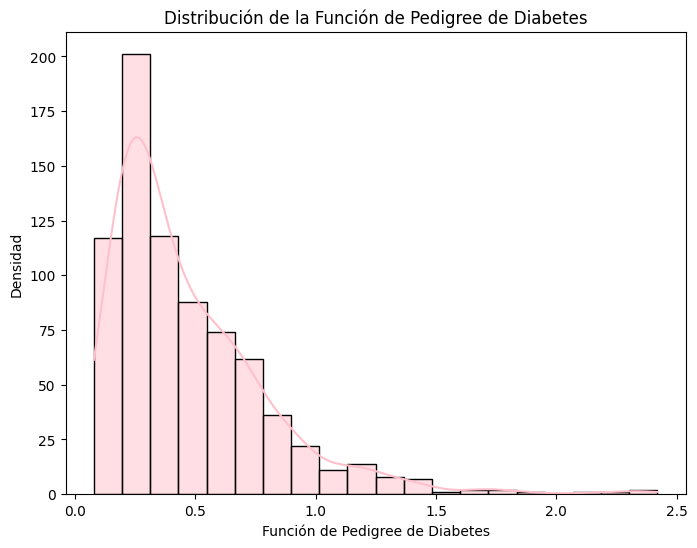

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['FuncionPedegreeDiabetes'], bins=20, kde=True, color='pink')
plt.title('Distribución de la Función de Pedigree de Diabetes')
plt.xlabel('Función de Pedigree de Diabetes')
plt.ylabel('Densidad')
plt.show()

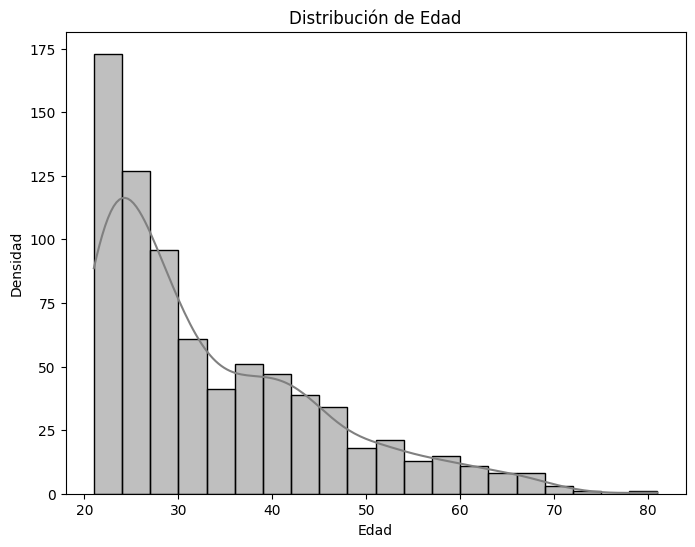

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Edad'], bins=20, kde=True, color='gray')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

C:\Users\Jaime\AppData\Local\Temp\ipykernel_3696\1902252724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Resultado', data=df, palette='Set2')


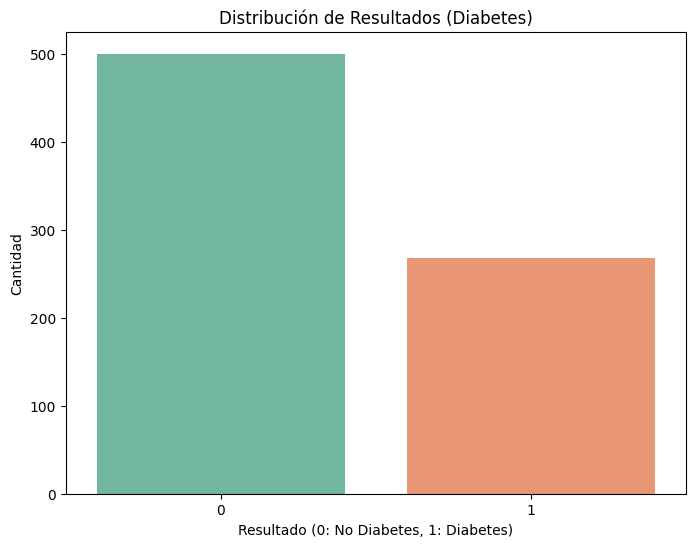

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Resultado', data=df, palette='Set2')
plt.title('Distribución de Resultados (Diabetes)')
plt.xlabel('Resultado (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Cantidad')
plt.show()

In [20]:
import seaborn as sns
matriz_correlacion=df.corr()
matriz_correlacion

,Embarazos,Glucosa,PresionSanguinea,GrosorPiel,Insulina,IMC,FuncionPedegreeDiabetes,Edad,Resultado
Embarazos,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucosa,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
PresionSanguinea,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
GrosorPiel,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulina,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
IMC,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
FuncionPedegreeDiabetes,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Edad,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Resultado,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


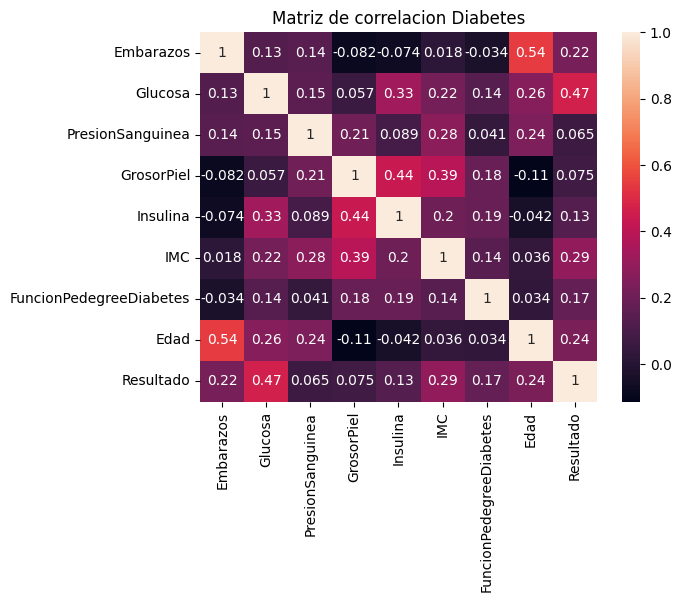

In [21]:
sns.heatmap(matriz_correlacion,annot=True)
plt.title("Matriz de correlacion Diabetes")
plt.show()

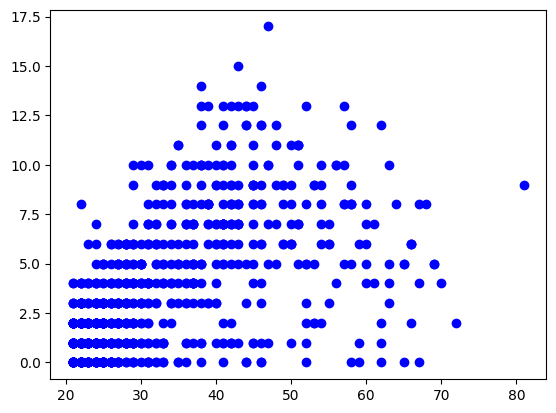

In [22]:
plt.scatter(df["Edad"], df["Embarazos"], color='blue')
plt.show()

In [23]:
df.columns

Index(['Embarazos', 'Glucosa', 'PresionSanguinea', 'GrosorPiel', 'Insulina',
       'IMC', 'FuncionPedegreeDiabetes', 'Edad', 'Resultado'],
      dtype='object')

## Crear particiones de entrenamiento y prueba de la base de datos

In [24]:
X = df[['Glucosa']]
y = df['Resultado']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#verificar la base de datos de X de prueba
X_test

,Glucosa
668,98
324,112
624,108
690,107
473,136
...,...
355,165
534,77
344,95
296,146


## Modelo de Regresión Logística

In [26]:
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [27]:
#Predecir resultados con x de prueba
y_pred = model.predict(X_test)

In [28]:
#Ver resultados de prueba aplicados con el modelo
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [29]:
#Resultados iniciales
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Resultado, Length: 154, dtype: int64

In [30]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.2f}")
print("Matriz de confusión:")
print(conf_matrix)

Precisión del modelo: 0.75
Matriz de confusión:
[[86 13]
 [25 30]]


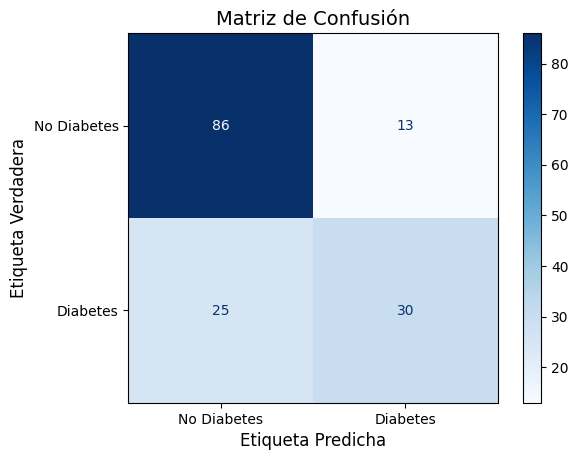

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Diabetes', 'Diabetes'])

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' para formato entero
plt.title('Matriz de Confusión', fontsize=14)
plt.xlabel('Etiqueta Predicha', fontsize=12)
plt.ylabel('Etiqueta Verdadera', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [33]:
#nuevo dato
x=pd.DataFrame([136],columns=X_train.columns)
x

,Glucosa
0,136


In [34]:
#nuevo dato
x=pd.DataFrame([150],columns=X_train.columns)
y_pred = model.predict(x)
if y_pred[0]==1:
    print(f"Es probable que se tenga Diabetes")
elif y_pred[0]==0:
    print(f"Es probable que no se tenga Diabetes")    

Es probable que se tenga Diabetes


## Modelo Random Forest

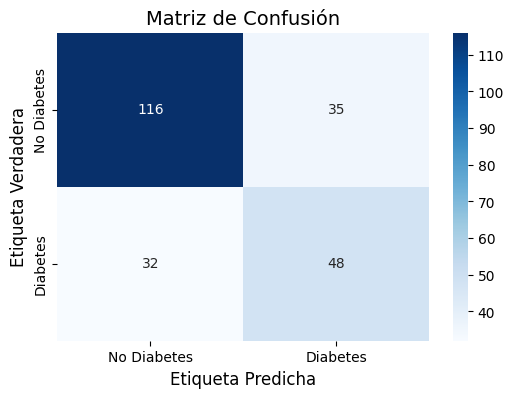

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de columnas relevantes
columnas_seleccionadas = ['Glucosa', 'IMC', 'Edad', 'Embarazos']

# Definir características (X) y variable objetivo (y)
X = df[columnas_seleccionadas]
y = df['Resultado']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Predecir con el modelo
y_pred = modelo_rf.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión', fontsize=14)
plt.xlabel('Etiqueta Predicha', fontsize=12)
plt.ylabel('Etiqueta Verdadera', fontsize=12)
plt.show()

# Realizar una predicción con random forest

In [49]:
# Crear un DataFrame con una sola fila de datos
nueva_fila = {
    'Glucosa': 120,       
    'IMC': 28.5,          
    'Edad': 35,             
    'Embarazos': 2        
}

nuevo_df = pd.DataFrame([nueva_fila])

# Hacer la predicción
prediccion = modelo_rf.predict(nuevo_df)

# Mostrar la predicción
print("Predicción:", "Puede tener Diabetes" if prediccion[0] == 1 else "No hay indicios de Diabetes")

Predicción: No hay indicios de Diabetes


## Regresion lineal

Coeficiente: 0.15216694590247992
Intercepto: -1.3065868271395646
Error Cuadrático Medio (MSE): 9.196138023112384
Coeficiente de Determinación (R²): 0.2863322051738231


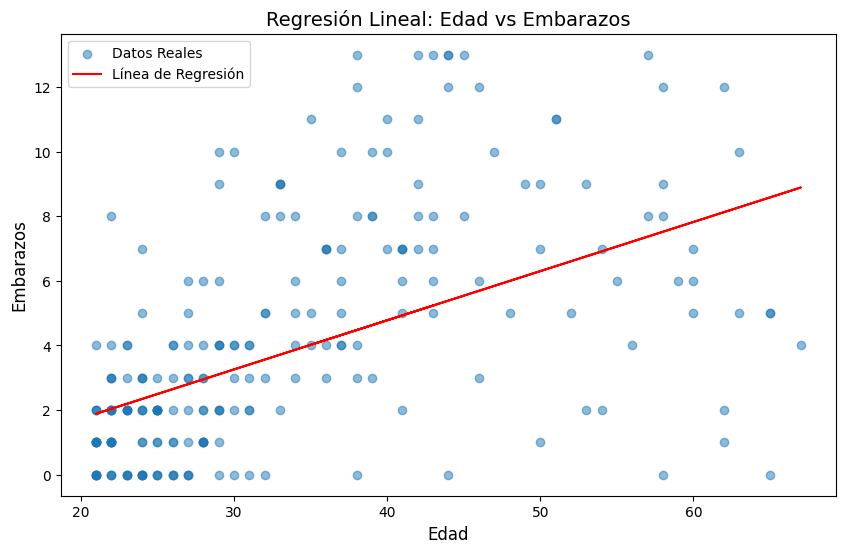

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


X = df[['Edad']]  # Variable independiente (Edad)
y = df['Embarazos']  # Variable dependiente (Embarazos)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Predecir con el modelo
y_pred = modelo_lr.predict(X_test)

# Evaluar el modelo
print("Coeficiente:", modelo_lr.coef_[0])  # Coeficiente de la variable Edad
print("Intercepto:", modelo_lr.intercept_)  # Término independiente
print("Error Cuadrático Medio (MSE):", mean_squared_error(y_test, y_pred))
print("Coeficiente de Determinación (R²):", r2_score(y_test, y_pred))

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Gráfica de dispersión de los datos reales
plt.scatter(X_test, y_test, alpha=0.5, label='Datos Reales')

# Gráfica de la línea de regresión
plt.plot(X_test, y_pred, color='red', label='Línea de Regresión')

plt.title('Regresión Lineal: Edad vs Embarazos', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Embarazos', fontsize=12)
plt.legend()
plt.show()

In [37]:
nueva_fila = {
    'Edad': [25]  # Edad para la predicción
}

dato = pd.DataFrame(nueva_fila)

# Hacer la predicción
y_pred = modelo_lr.predict(dato)

# Redondear la predicción a un número entero
prediccion_redondeada = round(y_pred[0])

# Mostrar la predicción
print(f"Predicción: El número posible de hijos a su edad de {dato['Edad'].values[0]} años, es {prediccion_redondeada} hijos")

Predicción: El número posible de hijos a su edad de 25 años, es 2 hijos
